# QUESTION 1

What are the main influences on Property Prices in Melbourne?

In this question, we are investigating the key attributes that contribute to deciding property prices. It considers dependent variables such as land size, building size, number and types of rooms, parking availability, property type, year built and time of sale. This will provide valuable insight to buyers, understanding what trade-offs may affect their budget as they look to enter the market, alongside providing sellers with some prediction modelling, basing their expected sale prices upon the attributes relevant to their property. 

In [1]:
#Importing the required packages
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
#Save the dataset filepath
cleaned_path = "~/Documents/DataBootcamp/PythonProjects/Properties_of_Melbourne_City_CLEANED.csv"

In [3]:
#Read the cleaned csv file into a dataframe
cleaned_df = pd.read_csv(cleaned_path)

In [4]:
#Display the table for preview
cleaned_df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-03-12,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-04-02,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-04-03,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2017-04-03,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2016-04-06,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
#Remove the old indexing column 'Unnamed: 0'
del cleaned_df["Unnamed: 0"]

#Check the changes have applied
cleaned_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2017-04-03,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2016-04-06,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


### Reducing the Dataset to relevant columns

In [6]:
#Reduce the dataset down to just the relevant columns
melb_data = cleaned_df[["Price", "Type", "Landsize", "BuildingArea", "Rooms", "Bedroom2", "Bathroom", "Car", "YearBuilt", "Date"]]



#Check the new dataframe
melb_data.head()

,Price,Type,Landsize,BuildingArea,Rooms,Bedroom2,Bathroom,Car,YearBuilt,Date
0,1480000,h,202.0,NaN,2,2.0,1.0,1.0,NaN,2016-03-12
1,1035000,h,156.0,79.0,2,2.0,1.0,0.0,1900.0,2016-04-02
2,1465000,h,134.0,150.0,3,3.0,2.0,0.0,1900.0,2017-04-03
3,850000,h,94.0,NaN,3,3.0,2.0,1.0,NaN,2017-04-03
4,1600000,h,120.0,142.0,4,3.0,1.0,2.0,2014.0,2016-04-06


## Type

### Remove NA Values and Group the data by Property Type

In [7]:
#Collate the data into 'Type' groups
house_df = melb_data.loc[melb_data["Type"] == 'h', :]
townhouse_df = melb_data.loc[melb_data["Type"] == 't', :]
unit_df = melb_data.loc[melb_data["Type"] == 'u', :]

#Isolate the Price data
house_price_data = house_df[["Price"]]
townhouse_price_data = townhouse_df[["Price"]]
unit_price_data = unit_df[["Price"]]

### Outliers

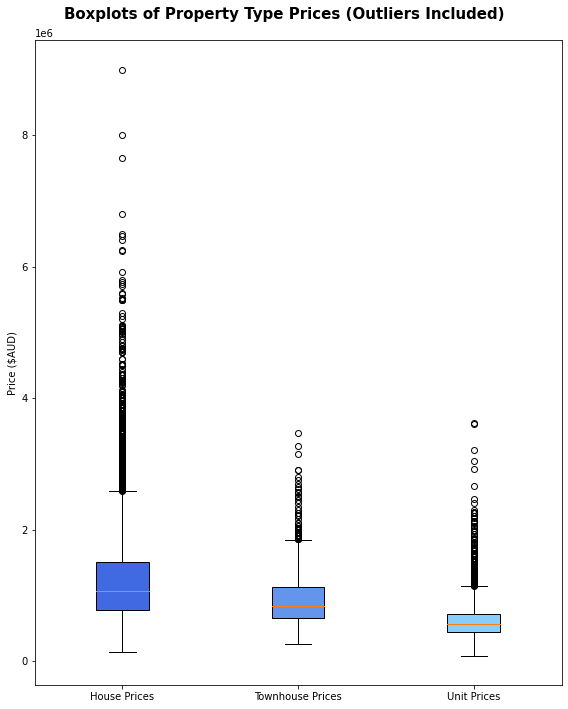

In [8]:
#Boxplot comparison prior to outlier removal
#Collect all the boxplot data
boxplot_type_dict = {"House Prices": house_price_data["Price"], 
                    "Townhouse Prices": townhouse_price_data["Price"], 
                    "Unit Prices": unit_price_data["Price"]}

fig, ax = plt.subplots(figsize=(8,10))
fig.suptitle("Boxplots of Property Type Prices (Outliers Included)", fontsize = 15, fontweight = 'bold')
bp = ax.boxplot(boxplot_type_dict.values(), labels=boxplot_type_dict.keys(), patch_artist=True)
bp['boxes'][0].set_facecolor('royalblue')
bp['boxes'][1].set_facecolor('cornflowerblue')
bp['boxes'][2].set_facecolor('lightskyblue')
ax.set_ylabel("Price ($AUD)")

plt.tight_layout()


In [10]:
iqr_multiplier = 1.5

#House
#Check for outliers
Q1 = house_df["Price"].quantile(0.25)
Q3 = house_df["Price"].quantile(0.75)
iqr = Q3 - Q1
upper_bound = Q3 + iqr_multiplier * iqr
lower_bound = Q1 - iqr_multiplier * iqr

#Remove Outliers
house_no_out = house_df.loc[(house_df["Price"] >= lower_bound) & (house_df["Price"] <= upper_bound), :]
house_price_data = house_no_out["Price"]
        
#printcheck
print(f"House Price values below {lower_bound} could be an outlier")
print(f"House Price values above {upper_bound} could be an outlier")
print ("----------------------------------")

#Townhouse
#Check for outliers
Q1 = townhouse_df["Price"].quantile(0.25)
Q3 = townhouse_df["Price"].quantile(0.75)
iqr = Q3 - Q1
upper_bound = Q3 + iqr_multiplier * iqr
lower_bound = Q1 - iqr_multiplier * iqr

#Remove Outliers
townhouse_no_out = townhouse_df.loc[(townhouse_df["Price"] >= lower_bound) & (townhouse_df["Price"] <= upper_bound), :]
townhouse_price_data = townhouse_no_out["Price"]
        
#printcheck
print(f"Townhouse Price values below {lower_bound} could be an outlier")
print(f"Townhouse Price values above {upper_bound} could be an outlier")
print ("----------------------------------")

#Unit
#Check for outliers
Q1 = unit_df["Price"].quantile(0.25)
Q3 = unit_df["Price"].quantile(0.75)
iqr = Q3 - Q1
upper_bound = Q3 + iqr_multiplier * iqr
lower_bound = Q1 - iqr_multiplier * iqr

#Remove Outliers
unit_no_out = unit_df.loc[(unit_df["Price"] >= lower_bound) & (unit_df["Price"] <= upper_bound), :]
unit_price_data = unit_no_out["Price"]
        
#printcheck
print(f"Unit Price values below {lower_bound} could be an outlier")
print(f"Unit Price values above {upper_bound} could be an outlier")
print ("----------------------------------")

House Price values below -320000.0 could be an outlier
House Price values above 2592000.0 could be an outlier
----------------------------------
Townhouse Price values below -63750.0 could be an outlier
Townhouse Price values above 1846250.0 could be an outlier
----------------------------------
Unit Price values below 25000.0 could be an outlier
Unit Price values above 1137000.0 could be an outlier
----------------------------------


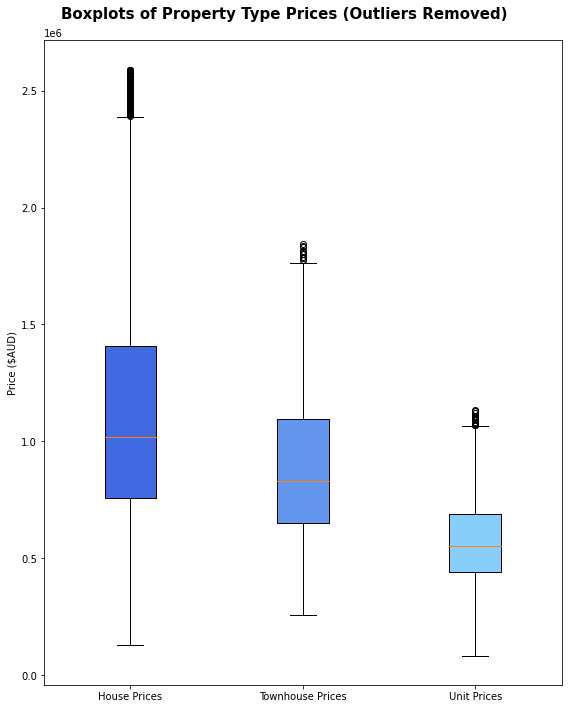

In [ ]:
#Boxplot comparison after outlier removal
#Collect all the boxplot data
boxplot_type_dict = {"House Prices": house_price_data, 
                    "Townhouse Prices": townhouse_price_data, 
                    "Unit Prices": unit_price_data}

fig, ax = plt.subplots(figsize=(8,10))
fig.suptitle("Boxplots of Property Type Prices (Outliers Removed)", fontsize = 15, fontweight = 'bold')
bp = ax.boxplot(boxplot_type_dict.values(), labels=boxplot_type_dict.keys(), patch_artist=True)
bp['boxes'][0].set_facecolor('royalblue')
bp['boxes'][1].set_facecolor('cornflowerblue')
bp['boxes'][2].set_facecolor('lightskyblue')
ax.set_ylabel("Price ($AUD)")

plt.tight_layout()


Although it appears by comparison of the medians and IQR that House Prices are higher than Townhouse Prices which are then higher than Unit Prices, this conclusion can be due to chance. Therefore, we should use a test to compare the means of each data set, to confirm that these differences are statistically significant differences.

### T-Test
As our three datasets are independent and do not share an equal variance, we must use Welch's T-Test. 

For each test, the statistical hypotheses are:
 - Null Hypothesis (H0): The true difference in means is equal to 0, or differences are caused by chance.
 - Alternative Hypothesis (H1): The true difference in means is not equal to 0, which isn't caused solely by chance.
The significance level used will be 0.05.
 - H0 is true if p > 0.05
 - H1 is true if p < 0.05

The assumptions of the test:
 - Independence of observations - each data point and dataset is independent of one another.
 - No significant outliers present - outliers were removed previously.
 - Normality - the data for each group is approximately normally distributed.

In [11]:
#Calculate the T-test for each comparison and display the results.
#House vs. Townhouse
t_test = st.ttest_ind(house_price_data, townhouse_price_data, equal_var=False)
house_vs_town_p = t_test[1]

if house_vs_town_p > 0.05:
    print(f'The p-value of the Welch T-Test between House Prices and Townhouse Prices is {house_vs_town_p}')
    print(f'Therefore, the null hypothesis cannot be rejected; House Prices are not significantly higher than Townhouse Prices.')
else:
    print(f'The p-value of the Welch T-Test between House Prices and Townhouse Prices is {house_vs_town_p}')
    print(f'Therefore, the null hypothesis can be rejected; House Prices are significantly higher than Townhouse Prices.')
print("-------------------------------------------")

#House vs. Unit
t_test = st.ttest_ind(house_price_data, unit_price_data, equal_var=False)
house_vs_unit_p = t_test[1]

if house_vs_unit_p > 0.05:
    print(f'The p-value of the Welch T-Test between House Prices and Unit Prices is {house_vs_unit_p}')
    print(f'Therefore, the null hypothesis cannot be rejected; House Prices are not significantly higher than Unit Prices.')
else:
    print(f'The p-value of the Welch T-Test between House Prices and Unit Prices is {house_vs_unit_p}')
    print(f'Therefore, the null hypothesis can be rejected; House Prices are significantly higher than Unit Prices.')
print("-------------------------------------------")

#Townhouse vs. Unit
t_test = st.ttest_ind(townhouse_price_data,unit_price_data, equal_var=False)
town_vs_unit_p = t_test[1]

if town_vs_unit_p > 0.05:
    print(f'The p-value of the Welch T-Test between Townhouse Prices and Unit Prices is {town_vs_unit_p}')
    print(f'Therefore, the null hypothesis cannot be rejected; Townhouse Prices are not significantly higher than Unit Prices.')
else:
    print(f'The p-value of the Welch T-Test between Townhouse Prices and Unit Prices is {town_vs_unit_p}')
    print(f'Therefore, the null hypothesis can be rejected; Townhouse Prices are significantly higher than Unit Prices.')
print("-------------------------------------------")


The p-value of the Welch T-Test between House Prices and Townhouse Prices is 5.002233744958822e-162
Therefore, the null hypothesis can be rejected; House Prices are significantly higher than Townhouse Prices.
-------------------------------------------
The p-value of the Welch T-Test between House Prices and Unit Prices is 0.0
Therefore, the null hypothesis can be rejected; House Prices are significantly higher than Unit Prices.
-------------------------------------------
The p-value of the Welch T-Test between Townhouse Prices and Unit Prices is 1.0175867593618204e-277
Therefore, the null hypothesis can be rejected; Townhouse Prices are significantly higher than Unit Prices.
-------------------------------------------


Since we have proven that Property Type is a significantly influential variable upon Property Price, we need to account for this in our further evaluation of other influential variables. To reduce the bias caused by this dependency, we will evaluate the correlation for each variable as a whole, but also grouped by Property Type. 

## Dependent Variables

### Removing NA values

In [12]:
#Reduce dataset
landsize_df = melb_data[["Price", "Landsize", "Type"]]
building_df = melb_data[["Price", "BuildingArea", "Type"]]
rooms_df = melb_data[["Price", "Rooms", "Type"]]
bedrooms_df = melb_data[["Price", "Bedroom2", "Type"]]
bathrooms_df = melb_data[["Price", "Bathroom", "Type"]]
cars_df = melb_data[["Price", "Car", "Type"]]
year_df = melb_data[["Price", "YearBuilt", "Type"]]


#Check for N/A Values
print(f'There are {landsize_df["Landsize"].isnull().sum()} NA Landsize values.')
print(f'There are {building_df["BuildingArea"].isnull().sum()} NA Building Area values.')
print(f'There are {rooms_df["Rooms"].isnull().sum()} NA Room values.')
print(f'There are {bedrooms_df["Bedroom2"].isnull().sum()} NA Bedroom values.')
print(f'There are {bathrooms_df["Bathroom"].isnull().sum()} NA Bathroom values.')
print(f'There are {cars_df["Car"].isnull().sum()} NA Car Spot values.')
print(f'There are {year_df["YearBuilt"].isnull().sum()} NA Year Built values.')

There are 4793 NA Landsize values.
There are 10634 NA Building Area values.
There are 0 NA Room values.
There are 3469 NA Bedroom values.
There are 3471 NA Bathroom values.
There are 3576 NA Car Spot values.
There are 9438 NA Year Built values.


In [13]:
#Remove the NA values
#Landsize
landsize_df = landsize_df.dropna(how='any')
landsize_df.reset_index(drop=True, inplace=True)

#Building Area
building_df = building_df.dropna(how='any')
building_df.reset_index(drop=True, inplace=True)

#Rooms
rooms_df = rooms_df.dropna(how='any')
rooms_df.reset_index(drop=True, inplace=True)

#Bedrooms
bedrooms_df = bedrooms_df.dropna(how='any')
bedrooms_df.reset_index(drop=True, inplace=True)

#Bathrooms
bathrooms_df = bathrooms_df.dropna(how='any')
bathrooms_df.reset_index(drop=True, inplace=True)

#Car Spots
cars_df = cars_df.dropna(how='any')
cars_df.reset_index(drop=True, inplace=True)

#Year Built
year_df = year_df.dropna(how='any')
year_df.reset_index(drop=True, inplace=True)

#Check the changes have applied
print(f'There are now {landsize_df["Landsize"].isnull().sum()} NA Landsize values.')
print(f'There are now {building_df["BuildingArea"].isnull().sum()} NA Building Area values.')
print(f'There are now {rooms_df["Rooms"].isnull().sum()} NA Room values.')
print(f'There are now {bedrooms_df["Bedroom2"].isnull().sum()} NA Bedroom values.')
print(f'There are now {bathrooms_df["Bathroom"].isnull().sum()} NA Bathroom values.')
print(f'There are now {cars_df["Car"].isnull().sum()} NA Car Spot values.')
print(f'There are now {year_df["YearBuilt"].isnull().sum()} NA Year Built values.')

There are now 0 NA Landsize values.
There are now 0 NA Building Area values.
There are now 0 NA Room values.
There are now 0 NA Bedroom values.
There are now 0 NA Bathroom values.
There are now 0 NA Car Spot values.
There are now 0 NA Year Built values.


### Outlier Testing - Boxplot Comparison

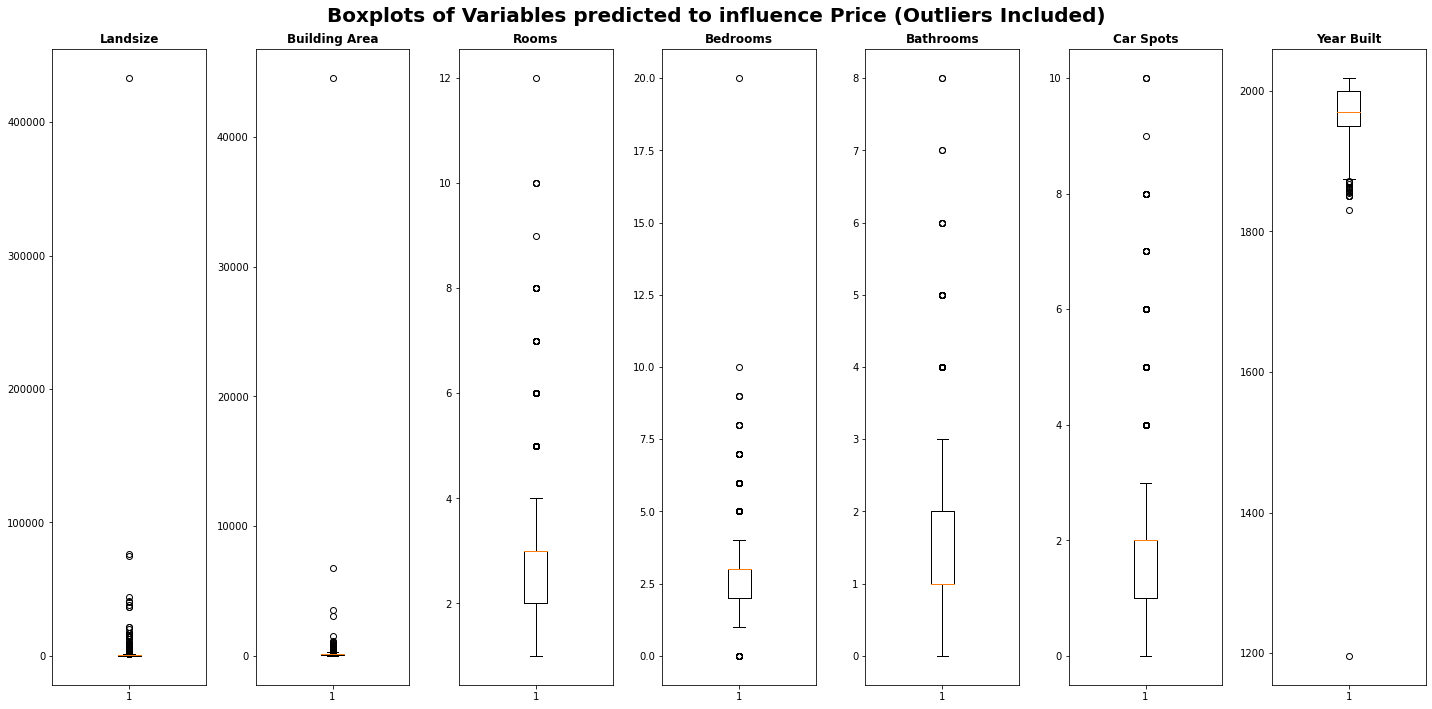

In [14]:
#Boxplot comparison prior to outlier removal
#Collect all the boxplot data
boxplot_data = [landsize_df["Landsize"], building_df["BuildingArea"], rooms_df["Rooms"], bedrooms_df["Bedroom2"], bathrooms_df["Bathroom"], cars_df["Car"], year_df["YearBuilt"]]
boxplot_titles = ["Landsize", "Building Area", "Rooms", "Bedrooms", "Bathrooms", "Car Spots", "Year Built"]

fig, axs = plt.subplots(1, len(boxplot_data), figsize=(20,10))
fig.suptitle("Boxplots of Variables predicted to influence Price (Outliers Included)", fontsize = 20, fontweight = 'bold')

for i, ax in enumerate(axs.flat):
    ax.boxplot(boxplot_data[i])
    ax.set_title(boxplot_titles[i], fontweight="bold")

plt.tight_layout()

The data is significantly skewed by some extreme outliers in each variable. 

To improve the accuracy of our correlation & linear regression calculations, we will calculate reasonable upper and lower bounds for each variable and remove the predicted outliers that fall outside this range.

### Outlier Removal
Outliers will be calculated and removed on a per variable basis, due to the different scales per variable and to preserve as large a sample size as possible.

In [15]:
#Landsize
#Check for outliers
Q1 = landsize_df["Landsize"].quantile(0.25)
Q3 = landsize_df["Landsize"].quantile(0.75)
iqr = Q3 - Q1
upper_bound = Q3 + iqr_multiplier * iqr
lower_bound = Q1 - iqr_multiplier * iqr

#Remove Outliers
landsize_no_out = landsize_df.loc[(landsize_df["Landsize"] >= lower_bound) & (landsize_df["Landsize"] <= upper_bound), :]
landsize_data = landsize_no_out["Landsize"]
        
#printcheck
print(f"Landsize values below {lower_bound} could be an outlier")
print(f"Landsize values above {upper_bound} could be an outlier")
print ("----------------------------------")

#Building Area
#Check for outliers
Q1 = building_df["BuildingArea"].quantile(0.25)
Q3 = building_df["BuildingArea"].quantile(0.75)
iqr = Q3 - Q1
upper_bound = Q3 + iqr_multiplier * iqr
lower_bound = Q1 - iqr_multiplier * iqr

#Remove Outliers
building_no_out = building_df.loc[(building_df["BuildingArea"] >= lower_bound) & (building_df["BuildingArea"] <= upper_bound), :]
building_data = building_no_out["BuildingArea"]
        
#printcheck
print(f"Building Area values below {lower_bound} could be an outlier")
print(f"Building Area values above {upper_bound} could be an outlier")
print ("----------------------------------")

#Rooms
#Check for outliers
Q1 = rooms_df["Rooms"].quantile(0.25)
Q3 = rooms_df["Rooms"].quantile(0.75)
iqr = Q3 - Q1
upper_bound = Q3 + iqr_multiplier * iqr
lower_bound = Q1 - iqr_multiplier * iqr

#Remove Outliers
rooms_no_out = rooms_df.loc[(rooms_df["Rooms"] >= lower_bound) & (rooms_df["Rooms"] <= upper_bound), :]
rooms_data = rooms_no_out["Rooms"]
        
#printcheck
print(f"Room values below {lower_bound} could be an outlier")
print(f"Room values above {upper_bound} could be an outlier")
print ("----------------------------------")

#Bedrooms
#Check for outliers
Q1 = bedrooms_df["Bedroom2"].quantile(0.25)
Q3 = bedrooms_df["Bedroom2"].quantile(0.75)
iqr = Q3 - Q1
upper_bound = Q3 + iqr_multiplier * iqr
lower_bound = Q1 - iqr_multiplier * iqr

#Remove Outliers
bedrooms_no_out = bedrooms_df.loc[(bedrooms_df["Bedroom2"] >= lower_bound) & (bedrooms_df["Bedroom2"] <= upper_bound), :]
bedrooms_data = bedrooms_no_out["Bedroom2"]
        
#printcheck
print(f"Bedroom values below {lower_bound} could be an outlier")
print(f"Bedroom values above {upper_bound} could be an outlier")
print ("----------------------------------")

#Bathrooms
#Check for outliers
Q1 = bathrooms_df["Bathroom"].quantile(0.25)
Q3 = bathrooms_df["Bathroom"].quantile(0.75)
iqr = Q3 - Q1
upper_bound = Q3 + iqr_multiplier * iqr
lower_bound = Q1 - iqr_multiplier * iqr

#Remove Outliers
bathrooms_no_out = bathrooms_df.loc[(bathrooms_df["Bathroom"] >= lower_bound) & (bathrooms_df["Bathroom"] <= upper_bound), :]
bathrooms_data = bathrooms_no_out["Bathroom"]
        
#printcheck
print(f"Bathroom values below {lower_bound} could be an outlier")
print(f"Bathroom values above {upper_bound} could be an outlier")
print ("----------------------------------")

#Car Spots
#Check for outliers
Q1 = cars_df["Car"].quantile(0.25)
Q3 = cars_df["Car"].quantile(0.75)
iqr = Q3 - Q1
upper_bound = Q3 + iqr_multiplier * iqr
lower_bound = Q1 - iqr_multiplier * iqr

#Remove Outliers
cars_no_out = cars_df.loc[(cars_df["Car"] >= lower_bound) & (cars_df["Car"] <= upper_bound), :]
cars_data = cars_no_out["Car"]
        
#printcheck
print(f"Car Spot values below {lower_bound} could be an outlier")
print(f"Car Spot values above {upper_bound} could be an outlier")
print ("----------------------------------")

#Year Built
#Check for outliers
Q1 = year_df["YearBuilt"].quantile(0.25)
Q3 = year_df["YearBuilt"].quantile(0.75)
iqr = Q3 - Q1
upper_bound = Q3 + iqr_multiplier * iqr
lower_bound = Q1 - iqr_multiplier * iqr

#Remove Outliers
year_no_out = year_df.loc[(year_df["YearBuilt"] >= lower_bound) & (year_df["YearBuilt"] <= upper_bound), :]
year_data = year_no_out["YearBuilt"]
        
#printcheck
print(f"Year Built values below {lower_bound} could be an outlier")
print(f"Year Built values above {upper_bound} could be an outlier")
print ("----------------------------------")

Landsize values below -535.25 could be an outlier
Landsize values above 1362.75 could be an outlier
----------------------------------
Building Area values below -28.5 could be an outlier
Building Area values above 295.5 could be an outlier
----------------------------------
Room values below 0.5 could be an outlier
Room values above 4.5 could be an outlier
----------------------------------
Bedroom values below 0.5 could be an outlier
Bedroom values above 4.5 could be an outlier
----------------------------------
Bathroom values below -0.5 could be an outlier
Bathroom values above 3.5 could be an outlier
----------------------------------
Car Spot values below -0.5 could be an outlier
Car Spot values above 3.5 could be an outlier
----------------------------------
Year Built values below 1875.0 could be an outlier
Year Built values above 2075.0 could be an outlier
----------------------------------


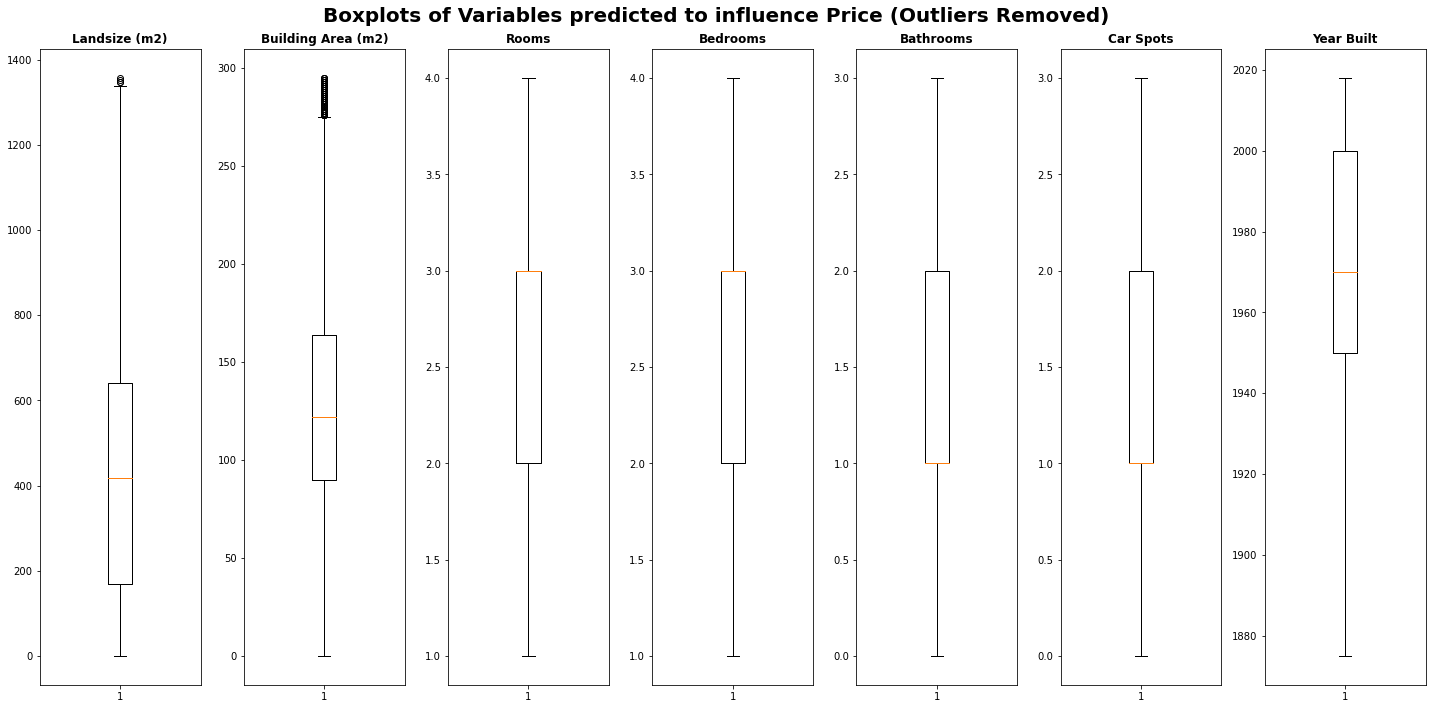

In [16]:
#Collect all the boxplot data
boxplot_data = [landsize_data, building_data, rooms_data, bedrooms_data, bathrooms_data, cars_data, year_data]
boxplot_titles = ["Landsize (m2)", "Building Area (m2)", "Rooms", "Bedrooms", "Bathrooms", "Car Spots", "Year Built"]

fig, axs = plt.subplots(1, len(boxplot_data), figsize=(20,10))
fig.suptitle("Boxplots of Variables predicted to influence Price (Outliers Removed)", fontsize = 20, fontweight = 'bold')

for i, ax in enumerate(axs.flat):
    ax.boxplot(boxplot_data[i])
    ax.set_title(boxplot_titles[i], fontweight="bold")

plt.tight_layout()

### Correlation Values

In [18]:
#Calculate correlation for price against each variable using the cleaned datasets
correlation_data = [landsize_no_out, building_no_out, rooms_no_out, bedrooms_no_out, bathrooms_no_out, cars_no_out, year_no_out]

for j in correlation_data:
    col_name = j.iloc[:,1].name
    corr_test = st.pearsonr(j.iloc[:,0], j.iloc[:,1])
    corr = corr_test[0]

    #Group the data
    house = j.loc[j["Type"] == "h", :]
    town = j.loc[j["Type"] == "t", :]
    unit = j.loc[j["Type"] == "u", :]

    #Grouped correlation tests
    corr_test_house = st.pearsonr(house.iloc[:,0], house.iloc[:,1])
    corr_house = corr_test_house[0]

    corr_test_town = st.pearsonr(town.iloc[:,0], town.iloc[:,1])
    corr_town = corr_test_town[0]

    corr_test_unit = st.pearsonr(town.iloc[:,0], town.iloc[:,1])
    corr_unit = corr_test_unit[0]

    print(f'The correlation value for {col_name} against Price is {round(corr,3)}')
    print(f'When grouped by Property Type, the correlation values are:')
    print(f' House: {round(corr_house,3)}')
    print(f' Townhouse: {round(corr_town,3)}')
    print(f' Unit: {round(corr_unit,3)}')
    print("--------------------------------------------------------")


The correlation value for Landsize against Price is 0.339
When grouped by Property Type, the correlation values are:
 House: 0.181
 Townhouse: 0.28
 Unit: 0.28
--------------------------------------------------------
The correlation value for BuildingArea against Price is 0.551
When grouped by Property Type, the correlation values are:
 House: 0.421
 Townhouse: 0.501
 Unit: 0.501
--------------------------------------------------------
The correlation value for Rooms against Price is 0.462
When grouped by Property Type, the correlation values are:
 House: 0.265
 Townhouse: 0.463
 Unit: 0.463
--------------------------------------------------------
The correlation value for Bedroom2 against Price is 0.451
When grouped by Property Type, the correlation values are:
 House: 0.248
 Townhouse: 0.401
 Unit: 0.401
--------------------------------------------------------
The correlation value for Bathroom against Price is 0.419
When grouped by Property Type, the correlation values are:
 House: 

### Linear Regression Plots - All

IndexError: list index out of range

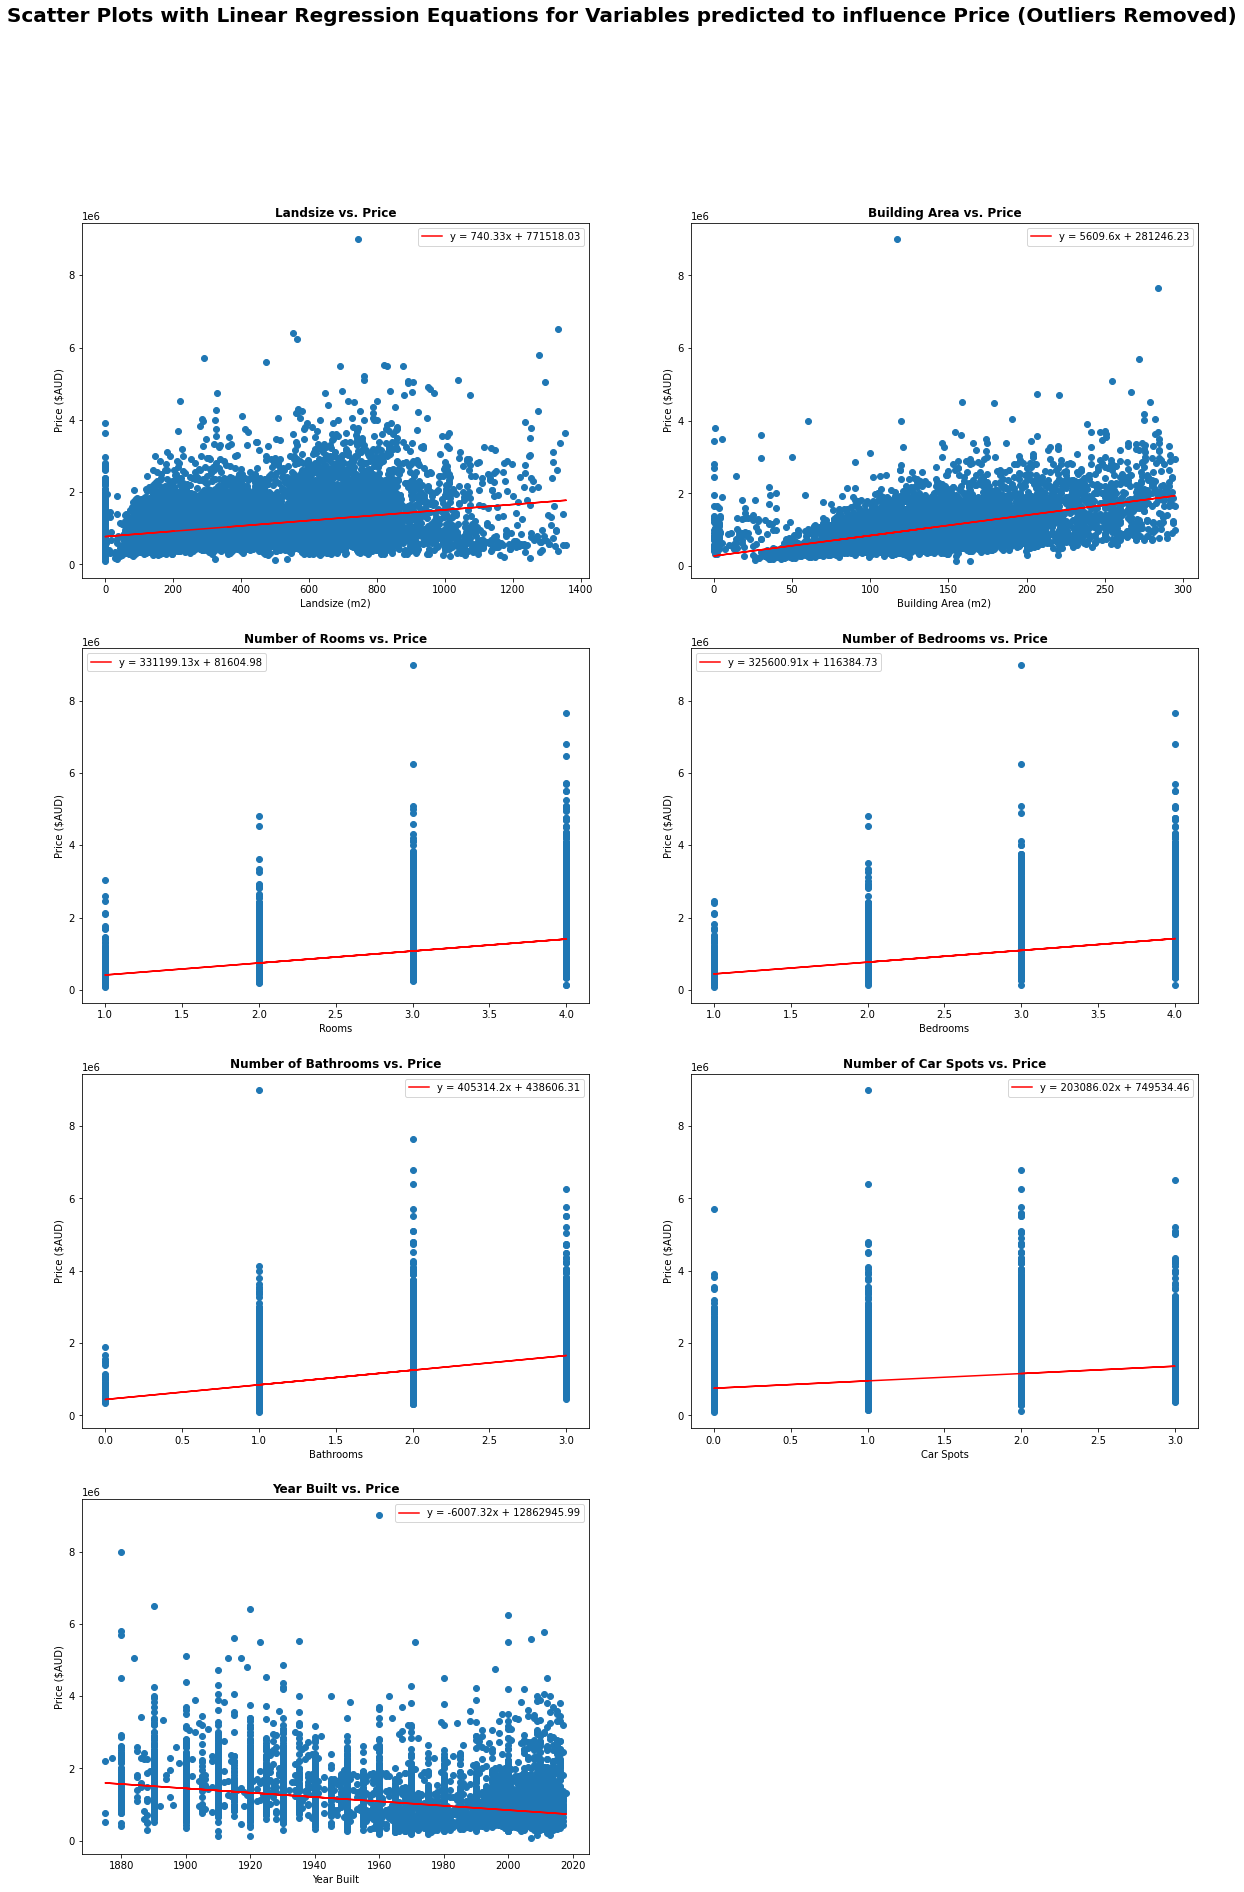

In [19]:
#Use the correlation data list for calculating each linear regression using for loops
#Create a list of subplot titles
scatter_titles = ["Landsize vs. Price", "Building Area vs. Price", "Number of Rooms vs. Price", "Number of Bedrooms vs. Price", "Number of Bathrooms vs. Price", "Number of Car Spots vs. Price", "Year Built vs. Price"]
scatter_xlabels = boxplot_titles

fig, axs = plt.subplots(4, 2, figsize=(20,30))
fig.suptitle("Scatter Plots with Linear Regression Equations for Variables predicted to influence Price (Outliers Removed)", fontsize = 20, fontweight = 'bold')
fig.delaxes(axs[3,1])

for i, ax in enumerate(axs.flat):
    #Calculate the linear regression
    x_values = correlation_data[i].iloc[:,1]
    y_values = correlation_data[i].iloc[:,0]
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    #Save the line equation
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    #Plot the data
    ax.scatter(x_values, y_values)
    ax.set_title(scatter_titles[i], fontweight="bold")
    ax.set_xlabel(scatter_xlabels[i])
    ax.set_ylabel("Price ($AUD)")

    #Add the regrssion line & equation
    ax.plot(x_values, regress_values, "r-")
    red_line = plt.Line2D([], [], color='red', label=line_eq)
    ax.legend(handles=[red_line])

plt.tight_layout()

We can clearly see from these plots, that the variables 'Rooms', 'Bedrooms', 'Bathrooms' and 'Car Spots' are discrete variables. However, as they are still numeric, ordinal values, Pearson's correlation test is still valid. Ordinal variables do not meet the assumptions of linear regression however, so we cannot use our linear regression equation as a prediction tool. Year Built is also an ordinal variable, but with a much larger range. Further testing would be required to validate the linear regression equation for Year Built, but it will likely not satisfy the assumptions of linear regression because of this. 

### Landsize vs. Price

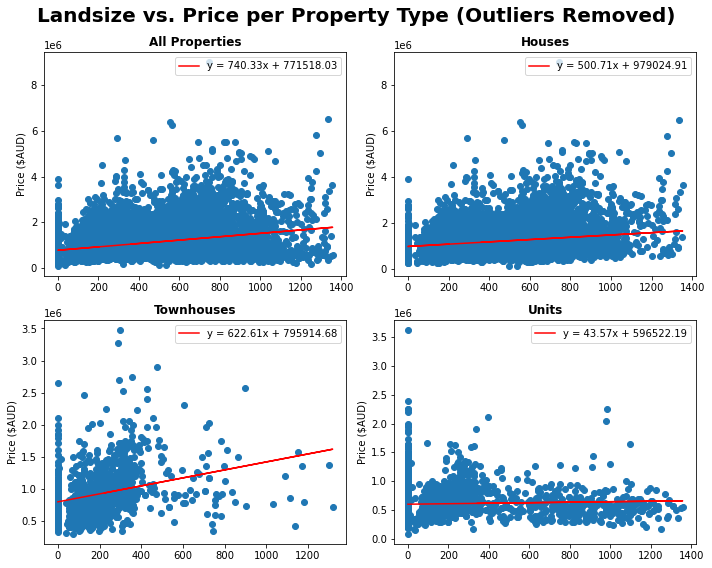

In [21]:
#Collect the data
house_landsize = landsize_no_out.loc[landsize_no_out["Type"] == "h", :]
town_landsize = landsize_no_out.loc[landsize_no_out["Type"] == "t", :]
unit_landsize = landsize_no_out.loc[landsize_no_out["Type"] == "u", :]

landsize_data = [landsize_no_out, house_landsize, town_landsize, unit_landsize]
landsize_titles = ["All Properties", "Houses", "Townhouses", "Units"]

#Plot the 4 boxplots
fig, axs = plt.subplots(2, 2, figsize=(10,8))
fig.suptitle("Landsize vs. Price per Property Type (Outliers Removed)", fontsize = 20, fontweight = 'bold')

for i, ax in enumerate(axs.flat):
    #Calculate the linear regression
    x_values = landsize_data[i].iloc[:,1]
    y_values = landsize_data[i].iloc[:,0]
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    #Save the line equation
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    #Plot the data
    ax.scatter(x_values, y_values)
    ax.set_title(landsize_titles[i], fontweight="bold")
    ax.set_ylabel("Price ($AUD)")

    #Add the regrssion line & equation
    ax.plot(x_values, regress_values, "r-")
    red_line = plt.Line2D([], [], color='red', label=line_eq)
    ax.legend(handles=[red_line])

plt.tight_layout()

### Building Area vs. Price

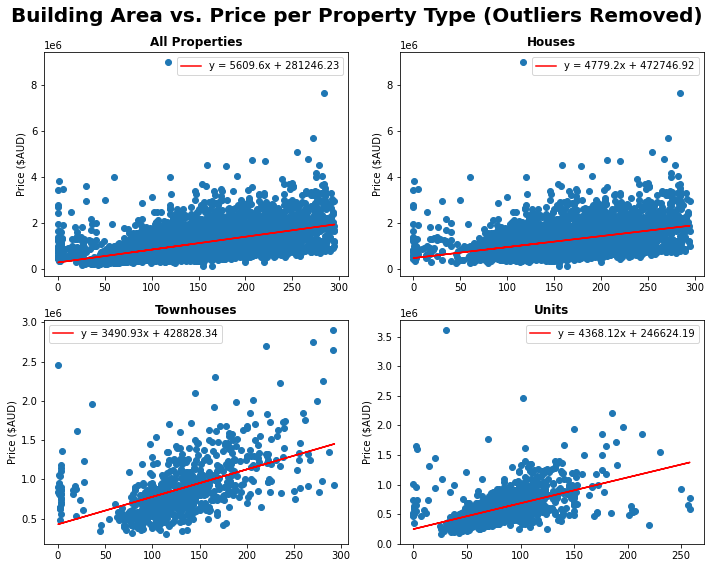

In [22]:
#Collect the data
house_building = building_no_out.loc[building_no_out["Type"] == "h", :]
town_building = building_no_out.loc[building_no_out["Type"] == "t", :]
unit_building = building_no_out.loc[building_no_out["Type"] == "u", :]

building_data = [building_no_out, house_building, town_building, unit_building]
building_titles = ["All Properties", "Houses", "Townhouses", "Units"]

#Plot the 4 boxplots
fig, axs = plt.subplots(2, 2, figsize=(10,8))
fig.suptitle("Building Area vs. Price per Property Type (Outliers Removed)", fontsize = 20, fontweight = 'bold')

for i, ax in enumerate(axs.flat):
    #Calculate the linear regression
    x_values = building_data[i].iloc[:,1]
    y_values = building_data[i].iloc[:,0]
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    #Save the line equation
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    #Plot the data
    ax.scatter(x_values, y_values)
    ax.set_title(building_titles[i], fontweight="bold")
    ax.set_ylabel("Price ($AUD)")

    #Add the regrssion line & equation
    ax.plot(x_values, regress_values, "r-")
    red_line = plt.Line2D([], [], color='red', label=line_eq)
    ax.legend(handles=[red_line])

plt.tight_layout()

### Number of Rooms vs. Price

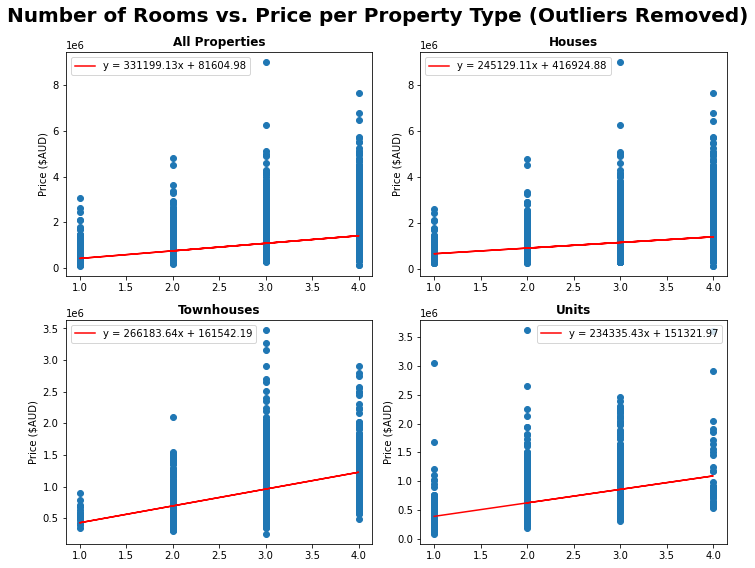

In [23]:
#Collect the data
house_rooms = rooms_no_out.loc[rooms_no_out["Type"] == "h", :]
town_rooms = rooms_no_out.loc[rooms_no_out["Type"] == "t", :]
unit_rooms = rooms_no_out.loc[rooms_no_out["Type"] == "u", :]

rooms_data = [rooms_no_out, house_rooms, town_rooms, unit_rooms]
rooms_titles = ["All Properties", "Houses", "Townhouses", "Units"]

#Plot the 4 boxplots
fig, axs = plt.subplots(2, 2, figsize=(10,8))
fig.suptitle("Number of Rooms vs. Price per Property Type (Outliers Removed)", fontsize = 20, fontweight = 'bold')

for i, ax in enumerate(axs.flat):
    #Calculate the linear regression
    x_values = rooms_data[i].iloc[:,1]
    y_values = rooms_data[i].iloc[:,0]
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    #Save the line equation
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    #Plot the data
    ax.scatter(x_values, y_values)
    ax.set_title(rooms_titles[i], fontweight="bold")
    ax.set_ylabel("Price ($AUD)")

    #Add the regrssion line & equation
    ax.plot(x_values, regress_values, "r-")
    red_line = plt.Line2D([], [], color='red', label=line_eq)
    ax.legend(handles=[red_line])

plt.tight_layout()

### Number of Bedrooms vs. Price

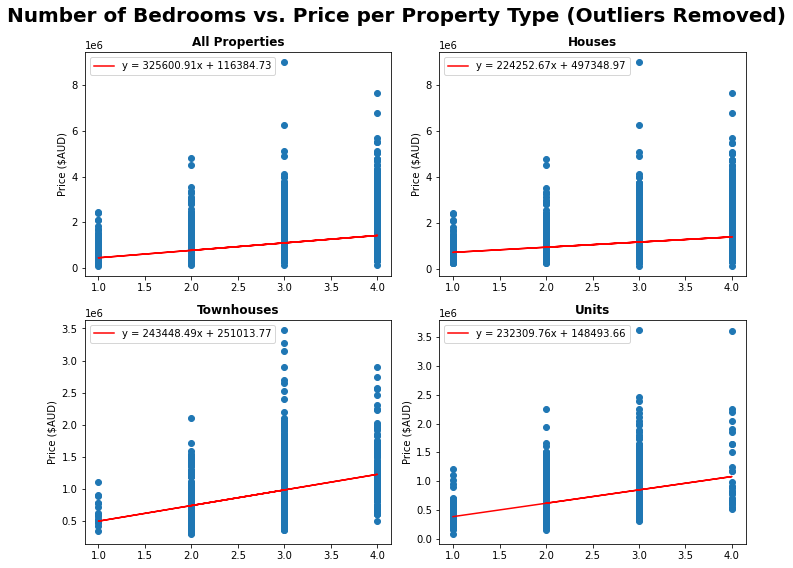

In [24]:
#Collect the data
house_bedrooms = bedrooms_no_out.loc[bedrooms_no_out["Type"] == "h", :]
town_bedooms = bedrooms_no_out.loc[bedrooms_no_out["Type"] == "t", :]
unit_bedrooms = bedrooms_no_out.loc[bedrooms_no_out["Type"] == "u", :]

bedrooms_data = [bedrooms_no_out, house_bedrooms, town_bedooms, unit_bedrooms]
bedrooms_titles = ["All Properties", "Houses", "Townhouses", "Units"]

#Plot the 4 boxplots
fig, axs = plt.subplots(2, 2, figsize=(10,8))
fig.suptitle("Number of Bedrooms vs. Price per Property Type (Outliers Removed)", fontsize = 20, fontweight = 'bold')

for i, ax in enumerate(axs.flat):
    #Calculate the linear regression
    x_values = bedrooms_data[i].iloc[:,1]
    y_values = bedrooms_data[i].iloc[:,0]
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    #Save the line equation
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    #Plot the data
    ax.scatter(x_values, y_values)
    ax.set_title(bedrooms_titles[i], fontweight="bold")
    ax.set_ylabel("Price ($AUD)")

    #Add the regrssion line & equation
    ax.plot(x_values, regress_values, "r-")
    red_line = plt.Line2D([], [], color='red', label=line_eq)
    ax.legend(handles=[red_line])

plt.tight_layout()

### Number of Bathrooms

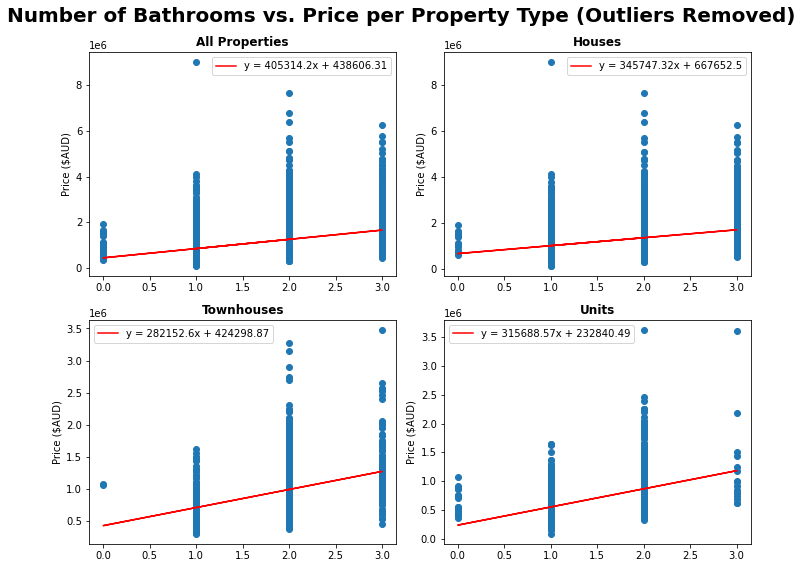

In [25]:
#Collect the data
house_bathrooms = bathrooms_no_out.loc[bathrooms_no_out["Type"] == "h", :]
town_bathrooms = bathrooms_no_out.loc[bathrooms_no_out["Type"] == "t", :]
unit_bathrooms = bathrooms_no_out.loc[bathrooms_no_out["Type"] == "u", :]

bathrooms_data = [bathrooms_no_out, house_bathrooms, town_bathrooms, unit_bathrooms]
bathrooms_titles = ["All Properties", "Houses", "Townhouses", "Units"]

#Plot the 4 boxplots
fig, axs = plt.subplots(2, 2, figsize=(10,8))
fig.suptitle("Number of Bathrooms vs. Price per Property Type (Outliers Removed)", fontsize = 20, fontweight = 'bold')

for i, ax in enumerate(axs.flat):
    #Calculate the linear regression
    x_values = bathrooms_data[i].iloc[:,1]
    y_values = bathrooms_data[i].iloc[:,0]
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    #Save the line equation
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    #Plot the data
    ax.scatter(x_values, y_values)
    ax.set_title(bathrooms_titles[i], fontweight="bold")
    ax.set_ylabel("Price ($AUD)")

    #Add the regrssion line & equation
    ax.plot(x_values, regress_values, "r-")
    red_line = plt.Line2D([], [], color='red', label=line_eq)
    ax.legend(handles=[red_line])

plt.tight_layout()

### Number of Car Spots vs. Price

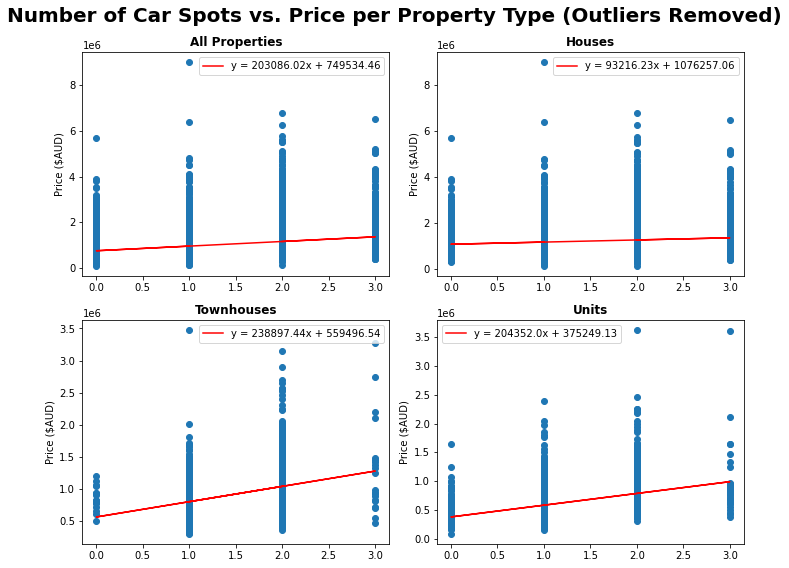

In [26]:
#Collect the data
house_car = cars_no_out.loc[cars_no_out["Type"] == "h", :]
town_car = cars_no_out.loc[cars_no_out["Type"] == "t", :]
unit_car = cars_no_out.loc[cars_no_out["Type"] == "u", :]

cars_data = [cars_no_out, house_car, town_car, unit_car]
cars_titles = ["All Properties", "Houses", "Townhouses", "Units"]

#Plot the 4 boxplots
fig, axs = plt.subplots(2, 2, figsize=(10,8))
fig.suptitle("Number of Car Spots vs. Price per Property Type (Outliers Removed)", fontsize = 20, fontweight = 'bold')

for i, ax in enumerate(axs.flat):
    #Calculate the linear regression
    x_values = cars_data[i].iloc[:,1]
    y_values = cars_data[i].iloc[:,0]
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    #Save the line equation
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    #Plot the data
    ax.scatter(x_values, y_values)
    ax.set_title(cars_titles[i], fontweight="bold")
    ax.set_ylabel("Price ($AUD)")

    #Add the regrssion line & equation
    ax.plot(x_values, regress_values, "r-")
    red_line = plt.Line2D([], [], color='red', label=line_eq)
    ax.legend(handles=[red_line])

plt.tight_layout()

### Year Built vs. Price

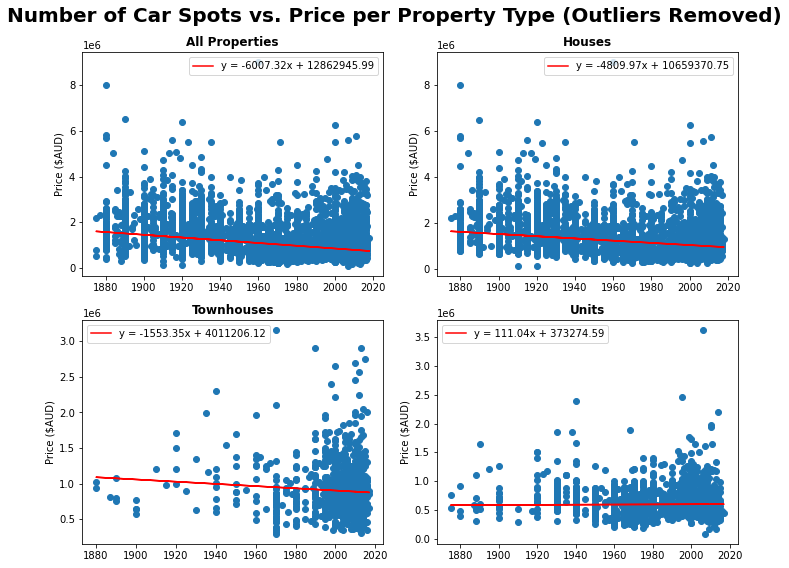

In [27]:
#Collect the data
house_year = year_no_out.loc[year_no_out["Type"] == "h", :]
town_year = year_no_out.loc[year_no_out["Type"] == "t", :]
unit_year = year_no_out.loc[year_no_out["Type"] == "u", :]

year_data = [year_no_out, house_year, town_year, unit_year]
year_titles = ["All Properties", "Houses", "Townhouses", "Units"]

#Plot the 4 boxplots
fig, axs = plt.subplots(2, 2, figsize=(10,8))
fig.suptitle("Year Built vs. Price per Property Type (Outliers Removed)", fontsize = 20, fontweight = 'bold')

for i, ax in enumerate(axs.flat):
    #Calculate the linear regression
    x_values = year_data[i].iloc[:,1]
    y_values = year_data[i].iloc[:,0]
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    #Save the line equation
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    #Plot the data
    ax.scatter(x_values, y_values)
    ax.set_title(year_titles[i], fontweight="bold")
    ax.set_ylabel("Price ($AUD)")

    #Add the regrssion line & equation
    ax.plot(x_values, regress_values, "r-")
    red_line = plt.Line2D([], [], color='red', label=line_eq)
    ax.legend(handles=[red_line])

plt.tight_layout()

## Date

### Reducing the Dataset

In [28]:
#Collate the Date and Price data
date_df = melb_data[["Price", "Type", "Date"]]

### Outliers

In [29]:
#Price
#Check for outliers
Q1 = date_df["Price"].quantile(0.25)
Q3 = date_df["Price"].quantile(0.75)
iqr = Q3 - Q1
upper_bound = Q3 + iqr_multiplier * iqr
lower_bound = Q1 - iqr_multiplier * iqr

#Remove Outliers
date_no_out = date_df.loc[(date_df["Price"] >= lower_bound) & (date_df["Price"] <= upper_bound), :]
        
#printcheck
print(f"House Price values below {lower_bound} could be an outlier")
print(f"House Price values above {upper_bound} could be an outlier")

House Price values below -370500.0 could be an outlier
House Price values above 2305500.0 could be an outlier


### Bin Values per Month

In [30]:
#Create the month list for appending
month = []

#Extract the month value for each entry
for x in range(0, len(date_no_out)):
    split_up = date_no_out.iloc[x, 2].split('-')
    #date_no_out.iloc[x, 2] = split_up[1]
    month.append(split_up[1])

date_no_out["Month"] = month
date_no_out.head()

/var/folders/04/p086nby17ts3st3cq66sgj0h0000gn/T/ipykernel_8537/3337193819.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_no_out["Month"] = month


,Price,Type,Date,Month
0,1480000,h,2016-03-12,03
1,1035000,h,2016-04-02,04
2,1465000,h,2017-04-03,04
3,850000,h,2017-04-03,04
4,1600000,h,2016-04-06,04


In [31]:
#Group the data by month
#All data
month_prices = date_no_out[["Month", "Price"]].groupby("Month").mean()
month_prices = month_prices["Price"].tolist()


#House data
month_house_prices = date_no_out.loc[date_no_out["Type"] == "h", :]
month_house_prices = month_house_prices[["Month", "Price"]].groupby("Month").mean()
month_house_prices = month_house_prices["Price"].tolist()


#Townhouse data
month_town_prices = date_no_out.loc[date_no_out["Type"] == "t", :]
month_town_prices = month_town_prices[["Month", "Price"]].groupby("Month").mean()
month_town_prices = month_town_prices["Price"].tolist()


#Unit
month_unit_prices = date_no_out.loc[date_no_out["Type"] == "u", :]
month_unit_prices = month_unit_prices[["Month", "Price"]].groupby("Month").mean()
month_unit_prices = month_unit_prices["Price"].tolist()

### Line Chart of Average Price per Month

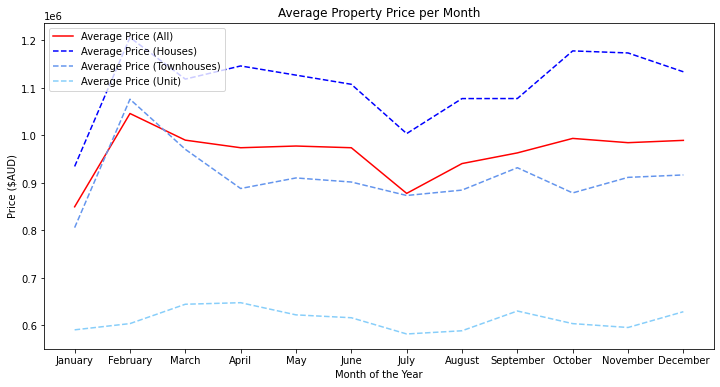

In [32]:
#Compare on a line chart
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

plt.figure(figsize=(12,6))

all_line = plt.plot(months, month_prices, color="red", label="Average Price (All)")
house_line = plt.plot(months, month_house_prices, color="blue", label="Average Price (Houses)", linestyle="dashed")
town_line = plt.plot(months, month_town_prices, color="cornflowerblue", label="Average Price (Townhouses)", linestyle="dashed")
unit_line = plt.plot(months, month_unit_prices, color="lightskyblue", label="Average Price (Unit)", linestyle="dashed")

plt.title("Average Property Price per Month")
plt.ylabel("Price ($AUD)")
plt.xlabel("Month of the Year")
plt.legend(loc="best")

plt.show()